# Ames Modeling

Load the dataset, begin modeling.

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from itertools import combinations

housing = pd.read_csv('data/ames_final.csv')

In [36]:
#housing.count()
housing.info()
#housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 88 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PID               2538 non-null   int64  
 1   GrLivArea         2538 non-null   int64  
 2   SalePrice         2538 non-null   int64  
 3   MSSubClass        2538 non-null   int64  
 4   MSZoning          2538 non-null   object 
 5   LotFrontage       2538 non-null   float64
 6   LotArea           2538 non-null   int64  
 7   Street            2538 non-null   object 
 8   LotShape          2538 non-null   object 
 9   LandContour       2538 non-null   object 
 10  Utilities         2538 non-null   object 
 11  LotConfig         2538 non-null   object 
 12  LandSlope         2538 non-null   object 
 13  Neighborhood      2538 non-null   object 
 14  Condition1        2538 non-null   object 
 15  Condition2        2538 non-null   object 
 16  BldgType          2538 non-null   object 


# LazyPredict Results

In [16]:
from lazypredict.Supervised import LazyRegressor

#from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_selection import VarianceThreshold

#remove categorical non numeric features
housing_num = housing.select_dtypes(exclude=[object])
features = list(housing_num.columns.values)
features.remove('PID')
features.remove('SalePrice')
features.remove('PricePerSF')
X = housing[features]  # Features
y = housing['SalePrice']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


  2%|█                                           | 1/42 [00:00<00:10,  3.93it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8637333716621349, 'Adjusted R-Squared': 0.8507836272844544, 'RMSE': 30748.31461746791, 'Time taken': 0.25420641899108887}


 17%|███████▎                                    | 7/42 [00:00<00:02, 15.51it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8915035888241387, 'Adjusted R-Squared': 0.88119291475991, 'RMSE': 27436.849906648193, 'Time taken': 0.2362673282623291}
{'Model': 'BayesianRidge', 'R-Squared': 0.8834287896104214, 'Adjusted R-Squared': 0.8723507480183232, 'RMSE': 28439.516844911774, 'Time taken': 0.010328531265258789}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7829152147751129, 'Adjusted R-Squared': 0.7622851271943462, 'RMSE': 38809.78654506139, 'Time taken': 0.04113364219665527}
{'Model': 'DummyRegressor', 'R-Squared': -0.011261209566445496, 'Adjusted R-Squared': -0.10736378671746838, 'RMSE': 83764.15955074431, 'Time taken': 0.006192684173583984}
{'Model': 'ElasticNet', 'R-Squared': 0.8576694497025892, 'Adjusted R-Squared': 0.8441434362833968, 'RMSE': 31425.02452176227, 'Time taken': 0.007965564727783203}
{'Model': 'ElasticNetCV', 'R-Squared': 0.15827406062776905, 'Adjusted R-Squared': 0.07828282664855069, 'RMSE': 76420.85926069404, 'Time taken': 0.04235339164733887}

 24%|██████████▏                                | 10/42 [00:01<00:05,  5.97it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9191338520959773, 'Adjusted R-Squared': 0.9114489481914914, 'RMSE': 23686.99339233385, 'Time taken': 0.9241032600402832}
{'Model': 'GammaRegressor', 'R-Squared': 0.882899821634383, 'Adjusted R-Squared': 0.8717715109473697, 'RMSE': 28503.9691496729, 'Time taken': 0.007712841033935547}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.0374132698491145, 'Adjusted R-Squared': -4.5161307296187925, 'RMSE': 186952.10175404657, 'Time taken': 0.2913978099822998}


 29%|████████████▎                              | 12/42 [00:02<00:08,  3.74it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9289407013962018, 'Adjusted R-Squared': 0.9221877658917371, 'RMSE': 22204.29656516826, 'Time taken': 0.754197359085083}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9269463545657342, 'Adjusted R-Squared': 0.9200038915007067, 'RMSE': 22513.732789033485, 'Time taken': 0.1821296215057373}


 38%|████████████████▍                          | 16/42 [00:02<00:04,  5.74it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.862732021677295, 'Adjusted R-Squared': 0.8496871166099105, 'RMSE': 30861.08421915728, 'Time taken': 0.022480010986328125}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8715196662909297, 'Adjusted R-Squared': 0.8593098721587502, 'RMSE': 29856.912061118346, 'Time taken': 0.054656982421875}
{'Model': 'KernelRidge', 'R-Squared': -3.638872456186106, 'Adjusted R-Squared': -4.07971562696837, 'RMSE': 179404.2706220342, 'Time taken': 0.06905937194824219}
{'Model': 'Lars', 'R-Squared': 0.883641100124053, 'Adjusted R-Squared': 0.8725832349090601, 'RMSE': 28413.606673081853, 'Time taken': 0.010108709335327148}
{'Model': 'LarsCV', 'R-Squared': 0.8732420430536628, 'Adjusted R-Squared': 0.8611959305144861, 'RMSE': 29656.109485444358, 'Time taken': 0.027988910675048828}


 48%|████████████████████▍                      | 20/42 [00:03<00:02,  8.96it/s]

{'Model': 'Lasso', 'R-Squared': 0.8836362657287532, 'Adjusted R-Squared': 0.8725779410895851, 'RMSE': 28414.196920926952, 'Time taken': 0.04334521293640137}
{'Model': 'LassoCV', 'R-Squared': 0.8823648291815476, 'Adjusted R-Squared': 0.871185676879146, 'RMSE': 28569.007610187746, 'Time taken': 0.061617136001586914}
{'Model': 'LassoLars', 'R-Squared': 0.8836369364028799, 'Adjusted R-Squared': 0.8725786754994819, 'RMSE': 28414.115036763113, 'Time taken': 0.009691715240478516}
{'Model': 'LassoLarsCV', 'R-Squared': 0.8823702946628409, 'Adjusted R-Squared': 0.8711916617582297, 'RMSE': 28568.343926064746, 'Time taken': 0.029932737350463867}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8831736234065787, 'Adjusted R-Squared': 0.8720713327583918, 'RMSE': 28470.625884227953, 'Time taken': 0.010973691940307617}
{'Model': 'LinearRegression', 'R-Squared': 0.8836411001240534, 'Adjusted R-Squared': 0.8725832349090606, 'RMSE': 28413.606673081806, 'Time taken': 0.006724119186401367}
{'Model': 'LinearSVR', 'R

 67%|████████████████████████████▋              | 28/42 [00:03<00:01,  9.34it/s]

{'Model': 'MLPRegressor', 'R-Squared': -4.494353031683996, 'Adjusted R-Squared': -5.016494572491978, 'RMSE': 195247.21214382918, 'Time taken': 0.6630103588104248}
{'Model': 'NuSVR', 'R-Squared': -0.044332110272200076, 'Adjusted R-Squared': -0.1435774944017394, 'RMSE': 85122.79530743105, 'Time taken': 0.1274242401123047}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8267878930709052, 'Adjusted R-Squared': 0.8103271312893066, 'RMSE': 34666.95392206885, 'Time taken': 0.00652003288269043}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8314588011941683, 'Adjusted R-Squared': 0.8154419270095968, 'RMSE': 34196.33794463951, 'Time taken': 0.01114344596862793}


 79%|█████████████████████████████████▊         | 33/42 [00:04<00:00, 13.02it/s]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8551299223234227, 'Adjusted R-Squared': 0.8413625715291043, 'RMSE': 31704.134918874795, 'Time taken': 0.05829596519470215}
{'Model': 'PoissonRegressor', 'R-Squared': 0.9201484401413564, 'Adjusted R-Squared': 0.9125599549712046, 'RMSE': 23537.92979333052, 'Time taken': 0.01408839225769043}
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
{'Model': 'RANSACRegressor', 'R-Squared': -1.745322532899811e+23, 'Adjusted R-Squared': -1.911184717451845e+23, 'RMSE': 3.479881128346458e+16, 'Time taken': 0.07196831703186035}


 83%|███████████████████████████████████▊       | 35/42 [00:06<00:01,  3.82it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9086884120947183, 'Adjusted R-Squared': 0.9000108529849291, 'RMSE': 25170.3647238835, 'Time taken': 2.1181375980377197}
{'Model': 'Ridge', 'R-Squared': 0.8836303859320074, 'Adjusted R-Squared': 0.8725715025216582, 'RMSE': 28414.91478888299, 'Time taken': 0.0069386959075927734}
{'Model': 'RidgeCV', 'R-Squared': 0.883524035800356, 'Adjusted R-Squared': 0.8724550456820312, 'RMSE': 28427.89601182986, 'Time taken': 0.010074615478515625}
{'Model': 'SGDRegressor', 'R-Squared': 0.8804426221530316, 'Adjusted R-Squared': 0.8690807979083953, 'RMSE': 28801.47646093624, 'Time taken': 0.012318134307861328}


 98%|█████████████████████████████████████████▉ | 41/42 [00:06<00:00,  6.12it/s]

{'Model': 'SVR', 'R-Squared': -0.10603853338230906, 'Adjusted R-Squared': -0.21114802683548728, 'RMSE': 87601.52968812804, 'Time taken': 0.24879121780395508}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8836411001240534, 'Adjusted R-Squared': 0.8725832349090606, 'RMSE': 28413.606673081806, 'Time taken': 0.00910639762878418}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8339816094696936, 'Adjusted R-Squared': 0.8182044838037466, 'RMSE': 33939.43909720285, 'Time taken': 0.010927200317382812}
{'Model': 'XGBRegressor', 'R-Squared': 0.9099289948963074, 'Adjusted R-Squared': 0.9013693313443366, 'RMSE': 24998.79444554119, 'Time taken': 0.10739946365356445}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 2030, number of used features: 43
[LightGBM] [Info] Start training from score 1

100%|███████████████████████████████████████████| 42/42 [00:06<00:00,  6.26it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9283378560026985, 'Adjusted R-Squared': 0.9215276306552227, 'RMSE': 22298.284880448417, 'Time taken': 0.09281563758850098}
                                        Adjusted R-Squared  \
Model                                                        
GradientBoostingRegressor                             0.92   
LGBMRegressor                                         0.92   
HistGradientBoostingRegressor                         0.92   
PoissonRegressor                                      0.91   
ExtraTreesRegressor                                   0.91   
XGBRegressor                                          0.90   
RandomForestRegressor                                 0.90   
BaggingRegressor                                      0.88   
TransformedTargetRegressor                            0.87   
LinearRegression                                      0.87   
Lars                                                  0.87   
LassoLars                    

# Simple Linear Regression

In [3]:
#Set up the model
lm = LinearRegression()

#remove categorical non numeric features
housing_num = housing.select_dtypes(exclude=[object])
features = list(housing_num.columns.values)
results = []

# Loop through each feature and examine the score
for i, feature in enumerate(housing[features]):
    if housing[feature].dtype=='object':
        print(feature," is non-numeric, skipping...")
    else:
        lm.fit(housing[[features[i]]], housing['SalePrice'])
        score=lm.score(housing[[features[i]]], housing['SalePrice'])
        results.append([score,feature])

results.sort(reverse=True)
print("R2 for Simple Linear Regression models: score, feature", results[:10])


R2 for Simple Linear Regression models: score, feature [[1.0, 'SalePrice'], [0.6750424654924184, 'TotalSF'], [0.6322355028516476, 'OverallQual'], [0.5428617986840347, 'GrLivArea'], [0.448826097677833, 'TotalBsmtSF'], [0.4305019512749193, '1stFlrSF'], [0.4151455102348103, 'GarageCars'], [0.40329158245136076, 'GarageArea'], [0.3345433768391709, 'PricePerSF'], [0.29548645742669943, 'YearBuilt']]


# Multiple Linear Regression

In [ ]:

def get_results(X, y):
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test) # Make predictions on the test set
    r2_value_calculated = r2_score(y_test, y_pred)
    return [r2_value_calculated, X.columns.values]

# Remove categorical non numeric features, select features
housing_num = housing.select_dtypes(exclude=[object])
features = list(housing_num.columns.values)
# remove PID, SalePrice from features
features.remove('PID')
features.remove('SalePrice')
features.remove('PricePerSF')

# Get all combinations
n = len(features)
results = []
for i in range(9,10,1):
    print(i, "features")
    comb = combinations(features, i)
    for c in comb:
        #time.sleep(.01)
        X = housing[list(c)]  # Features
        y = housing['SalePrice']  # Target variable
        r = get_results(X, y)
        if r[0] > 0.8: 
            results.append(r)
            print(r)

#results.sort(reverse=True)
#print("R2 for Multiple Linear Regression models: score, features", results[:20])
      
#This was used for Simple Linear Regression, but r2_score for multiple. 
#What is the difference? Which to use?
# Calculate the R-squared score
#r2_score = lm.score(X_test, y_test)
#print("R-squared:", r2_score)
# Calculate the R-squared score
#r2_value_calculated = r2_score(y_test, y_pred)
#print("R-squared:", r2_value_calculated)

9 features
[0.8027934218137804, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'],
      dtype=object)]
[0.8422120991400813, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1'],
      dtype=object)]
[0.8231295980706196, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF'],
      dtype=object)]
[0.8136706378386503, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF'],
      dtype=object)]
[0.8113501313407784, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '2ndFlrSF'],
      dtype=object)]
[0.8089004641600882, array(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotAre

In [5]:
results.sort(reverse=True)
for i in range(len(results)):
    print(results[i],sep="\n")
    #calculate tolerance (the R2 between features)
    #handle categorical data
      

[0.8171903615969434, array(['OverallQual', 'BsmtUnfSF', 'TotalSF'], dtype=object)]
[0.8064642439793541, array(['OverallQual', 'BsmtFinSF1', 'TotalSF'], dtype=object)]
[0.8033445186555184, array(['OverallQual', 'MasVnrArea', 'TotalSF'], dtype=object)]
[0.8017831338504076, array(['GrLivArea', 'OverallQual', 'BsmtFinSF1'], dtype=object)]
[0.8000299314095581, array(['OverallQual', 'GarageArea', 'TotalSF'], dtype=object)]


# K-fold Cross Validation

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'LowQualFinSF', 'BedroomAbvGr']
#features = ['OverallQual']
print(features)
X = housing[features]
y = housing['SalePrice']

# Create an instance of KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store RMSE and R-squared values for each fold
rmse_scores = []
r2_scores = []

# Iterate over the folds
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 2. Modeling (MLR)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test) # Make predictions on the test set
    
    # 3. Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Append the scores to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(i,"R-squared:", r2)
    i=i+1

# Calculate the average RMSE and R-squared across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average RMSE:", avg_rmse)
print("Average R-squared:", avg_r2)


['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BedroomAbvGr']
0 R-squared: 0.8711574593294258
1 R-squared: 0.8705324642231851
2 R-squared: 0.8638143350948937
3 R-squared: 0.8835724754915262
4 R-squared: 0.8758713624200646
Average RMSE: 26896.16478586815
Average R-squared: 0.872989619311819


In [13]:
# Identify garage-related features
garage_features = [col for col in housing.columns if 'Garage' in col]

# Create a new DataFrame with only the identified garage-related features
garage_df = housing[garage_features]

# Find rows with NaN values in garage-related features
rows_with_garage_nan = garage_df[garage_df.isna().any(axis=1)]

rows_with_garage_nan.head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
18,NaN,NaN,NaN,0.0,0.0,NaN,NaN
23,NaN,NaN,NaN,0.0,0.0,NaN,NaN
45,NaN,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
51,NaN,NaN,NaN,0.0,0.0,NaN,NaN


Fill NaN with 'None' for categorical columns


In [26]:
# Calculate the mean of the 'GarageArea' column
mean_garage_area = housing['GarageArea'].mean()

# Fill NaN values in 'GarageArea' with the mean
housing['GarageArea'].fillna(mean_garage_area, inplace=True)

In [27]:
# Filter the dataset to include rows with 'GarageArea' greater than 100
filtered_garage = housing[housing['GarageArea'] > 100][['GarageArea', 'SalePrice']]


lm = LinearRegression()
lm.fit(filtered_garage[['GarageArea']], filtered_garage[['SalePrice']])
lm.score(filtered_garage[['GarageArea']], filtered_garage[['SalePrice']])

0.39296389699666245

In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X = filtered_garage[['GarageArea']]  # Feature(s)
y = filtered_garage[['SalePrice']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model with the training data
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Calculate the R-squared score
r2_score = lm.score(X_test, y_test)
print("R-squared:", r2_score)


Coefficient: [[258.39217779]]
Intercept: [55492.76497089]
R-squared: 0.3791391507661024


In [29]:

# # Filter 'GarageArea' to include only values greater than 100
# filtered_garage = housing[housing['GarageArea'] > 100]['GarageArea']

# # Reset the index of the 'housing' DataFrame
# housing = housing.reset_index(drop=True)
# filtered_garage_reset = filtered_garage.reset_index(drop=True)

# # Select the features and target variable
# X = pd.DataFrame({'GarageArea': filtered_garage, 'YearBuilt': housing['YearBuilt']})
# y = housing['SalePrice']  # Target variable

# # Handle missing values in the features
# X = X.fillna(X.mean())  # Drop rows with missing values

# # Create a LinearRegression model
# lm = LinearRegression()

# # Fit the model with the data
# lm.fit(X, y)

# # Print the coefficients and intercept
# print("Intercept:", lm.intercept_)
# print("Coefficients:", lm.coef_)

# # Calculate the R-squared score of the model
# r_squared = lm.score(X, y)
# print("R-squared:", r_squared)


In [30]:

# # Filter 'GarageArea' to include only values greater than 100
# filtered_garage = housing[housing['GarageArea'] > 100]['GarageArea']

# # Reset the index of the 'housing' DataFrame
# housing = housing.reset_index(drop=True)

# # Select the features and target variable
# X = pd.DataFrame({'GarageArea': filtered_garage, 'GrLivArea': housing['GrLivArea']})
# y = housing['SalePrice']  # Target variable

# # Handle missing values in the features
# X = X.fillna(X.mean())  # Drop rows with missing values

# # Create a LinearRegression model
# lm = LinearRegression()

# # Fit the model with the data
# lm.fit(X, y)

# # Print the coefficients and intercept
# print("Intercept:", lm.intercept_)
# print("Coefficients:", lm.coef_)

# # Calculate the R-squared score of the model
# r_squared = lm.score(X, y)
# print("R-squared:", r_squared)


In [31]:
from sklearn.metrics import r2_score


# Select the features and target variable
X = housing[['GrLivArea', 'OverallQual']]  # Features
y = housing['SalePrice']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model with the training data
lm.fit(X_train, y_train)

# Print the coefficients and intercept
coefficients = lm.coef_
intercept = lm.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Calculate the R-squared score
r2_value_calculated = r2_score(y_test, y_pred)
print("R-squared:", r2_value_calculated)


Coefficients: [   60.91011084 30706.39444713]
Intercept: -98477.36243317174
R-squared: 0.7160128760601867


In [32]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=10.0)  # You can adjust the alpha parameter
lasso_model = Lasso(alpha=100.0)  # You can adjust the alpha parameter

# Fit the models on the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions using Ridge and Lasso models
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)


In [33]:
from sklearn.metrics import r2_score

# Calculate R-squared for Ridge and Lasso models
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("R-squared for Ridge model:", ridge_r2)
print("R-squared for Lasso model:", lasso_r2)


R-squared for Ridge model: 0.7159447511312755
R-squared for Lasso model: 0.7159675842110238


In [34]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = [0.01, 0.1, 1, 10, 100]

# Create a grid search for Ridge and Lasso with cross-validation
ridge_grid = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
lasso_grid = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5)

# Fit the grid search on the training data
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Get the best alpha value from grid search
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

print("Best alpha for Ridge:", best_ridge_alpha)
print("Best alpha for Lasso:", best_lasso_alpha)


Best alpha for Ridge: 10
Best alpha for Lasso: 100


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars']
X = housing[features]
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modeling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# If you want to see the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


RMSE: 35960.93
R^2: 0.79
Coefficients: [2.22285980e+04 4.55898882e+01 3.15279461e+01 1.65115283e+01
 1.38192377e+04]
Intercept: -100112.95387303791


In [36]:
# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modeling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

# If you want to see the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


RMSE: 32936.1143
R^2: 0.8237
Coefficients: [ 1.59131867e+04  4.82470846e+01  2.73825711e+01  1.15693888e+01
  4.07197967e+01  2.45432440e+02 -9.72243702e+03  4.04901357e+02
  3.61929264e+01  1.02894409e+04]
Intercept: -1332241.5206992174


In [38]:

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['LogSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modeling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")

# If you want to see the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


RMSE: 0.13
R^2: 0.8834
Coefficients: [ 9.16976151e-02  2.41976932e-04  1.21572549e-04  4.65246672e-05
  2.14384211e-04  1.96729503e-03 -3.11647663e-02  2.18350779e-03
  1.29498564e-05  6.39113550e-02]
Intercept: 2.6193607001176833


In [39]:

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['LogSalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modeling (Ridge)
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Ridge): {rmse:.4f}")
print(f"R^2 (Ridge): {r2:.4f}")

# If you want to see the model coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
print("Coefficients (Ridge):", coefficients)
print("Intercept (Ridge):", intercept)


RMSE (Ridge): 0.1338
R^2 (Ridge): 0.8835
Coefficients (Ridge): [ 9.16386367e-02  2.41998274e-04  1.21623737e-04  4.65275413e-05
  2.14428690e-04  1.96753034e-03 -3.10557746e-02  2.18372372e-03
  1.30291864e-05  6.38204912e-02]
Intercept (Ridge): 2.6185898401657983


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load your housing dataset
# Assuming you have already loaded your dataset into the 'housing' DataFrame

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['LogSalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modeling (Lasso)
alpha = .0001  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Lasso): {rmse:.4f}")
print(f"R^2 (Lasso): {r2:.4f}")

# If you want to see the model coefficients
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
print("Coefficients (Lasso):", coefficients)
print("Intercept (Lasso):", intercept)


RMSE (Lasso): 0.1338
R^2 (Lasso): 0.8834
Coefficients (Lasso): [ 9.15918443e-02  2.41744963e-04  1.21679415e-04  4.65488819e-05
  2.14469007e-04  1.96526962e-03 -3.04897571e-02  2.18192808e-03
  1.32248978e-05  6.36613349e-02]
Intercept (Lasso): 2.626353716390671


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# Load your housing dataset
# Assuming you have already loaded your dataset into the 'housing' DataFrame

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['LogSalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modeling (ElasticNet)
alpha = .001  # Regularization strength
l1_ratio = 0.5  # Mixing parameter, controls the balance between L1 and L2 regularization
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model.fit(X_train, y_train)
y_pred = elasticnet_model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (ElasticNet): {rmse:.4f}")
print(f"R^2 (ElasticNet): {r2:.4f}")

# If you want to see the model coefficients
coefficients = elasticnet_model.coef_
intercept = elasticnet_model.intercept_
print("Coefficients (ElasticNet):", coefficients)
print("Intercept (ElasticNet):", intercept)


RMSE (ElasticNet): 0.1338
R^2 (ElasticNet): 0.8834
Coefficients (ElasticNet): [ 9.11154013e-02  2.40843139e-04  1.22152571e-04  4.66481239e-05
  2.14847751e-04  1.95744193e-03 -2.77026506e-02  2.17584651e-03
  1.43941011e-05  6.25805925e-02]
Intercept (ElasticNet): 2.653433443475567


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# Load your housing dataset
# Assuming you have already loaded your dataset into the 'housing' DataFrame

# 1. Data Preparation
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['LogSalePrice']

# Create an instance of KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store RMSE and R-squared values for each fold
rmse_scores = []
r2_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 2. Modeling (ElasticNet)
    alpha = 1.0  # Regularization strength
    l1_ratio = 0.5  # Mixing parameter, controls the balance between L1 and L2 regularization
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet_model.fit(X_train, y_train)
    y_pred = elasticnet_model.predict(X_test)
    
    # 3. Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Append the scores to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate the average RMSE and R-squared across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average RMSE (ElasticNet):", avg_rmse)
print("Average R-squared (ElasticNet):", avg_r2)


Average RMSE (ElasticNet): 0.17192869400267113
Average R-squared (ElasticNet): 0.7998593592298537


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preparation
# ... (Your data preparation code here)

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge hyperparameters (alpha values, you can adjust this list for finer search if needed)
params = {'alpha': np.logspace(-6, 6, 13)}

grid_search = GridSearchCV(Ridge(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# 3. Training and Hyperparameter Optimization
grid_search.fit(X, y)

# Print the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")


Best Alpha: 0.1
Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 1. Data Preparation
# ... (Your data preparation code here)

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lasso hyperparameters (alpha values, you can adjust this list for finer search if needed)
params = {'alpha': np.logspace(-6, 6, 13)}

grid_search = GridSearchCV(Lasso(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# 3. Training and Hyperparameter Optimization
grid_search.fit(X, y)

# Print the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")


Best Alpha: 1e-06
Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 1. Data Preparation
# ... (Your data preparation code here)

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lasso hyperparameters (alpha values, you can adjust this list for finer search if needed)
params = {'alpha': np.logspace(-6, 6, 13)}

grid_search = GridSearchCV(ElasticNet(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# 3. Training and Hyperparameter Optimization
grid_search.fit(X, y)

# Print the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")


Best Alpha: 1e-06
Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Data Preparation
# ... (Your data preparation code here)

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate R-squared for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")
    
average_r2 = np.mean(r2_scores)
print(f"Average R^2: {average_r2:.4f}")



Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415
Average R^2: 0.8587


In [48]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset and define X (features) and y (target variable)
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['SalePrice']

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation results for each fold
mae_scores = []
mse_scores = []
rmse_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate MAE, MSE, and RMSE for this fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append the scores to the respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate the mean and standard deviation of the scores across folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

std_mae = np.std(mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)

# Print the results
print(f"Mean Absolute Error (MAE): {mean_mae:.4f} +/- {std_mae:.4f}")
print(f"Mean Squared Error (MSE): {mean_mse:.4f} +/- {std_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_rmse:.4f} +/- {std_rmse:.4f}")


Mean Absolute Error (MAE): 21348.9824 +/- 538.7870
Mean Squared Error (MSE): 950357983.6669 +/- 115521005.9409
Root Mean Squared Error (RMSE): 30770.5824 +/- 1878.6274


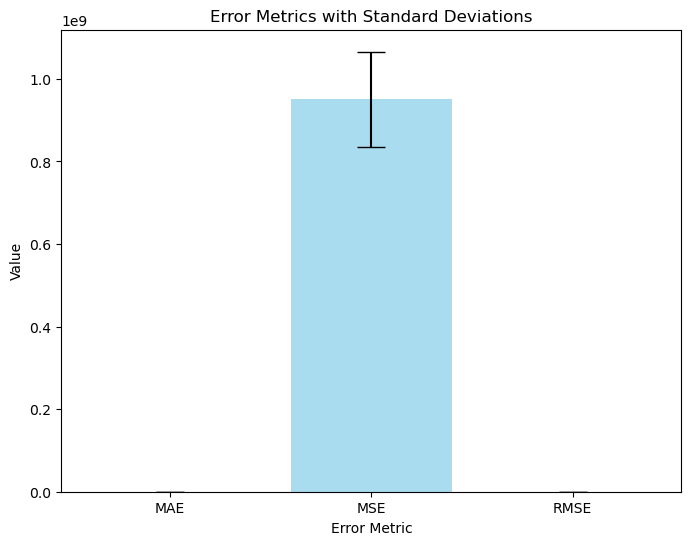

In [49]:
import matplotlib.pyplot as plt

# Mean error values
error_metrics = ['MAE', 'MSE', 'RMSE']
mean_errors = [21348.9824, 950357983.6669, 30770.5824]

# Standard deviations
std_dev = [538.7870, 115521005.9409, 1878.6274]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(error_metrics, mean_errors, yerr=std_dev, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Error Metrics with Standard Deviations')
plt.show()

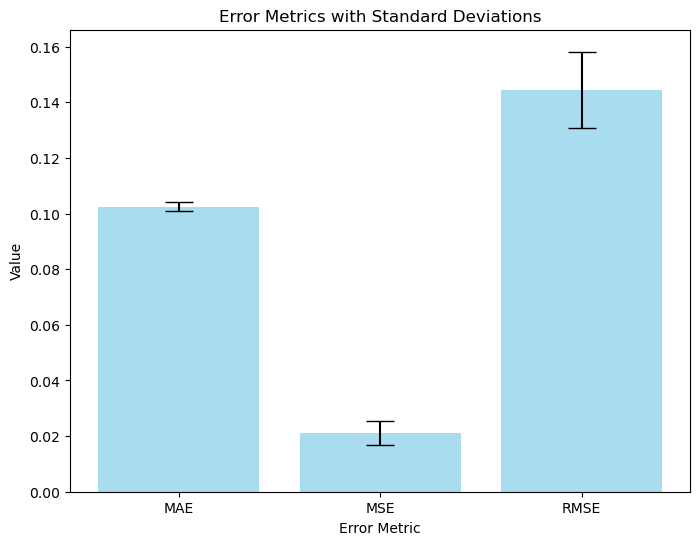

In [50]:
import matplotlib.pyplot as plt

# Mean error values
error_metrics = ['MAE', 'MSE', 'RMSE']
mean_errors = [0.1025, 0.0211, 0.1445]

# Standard deviations
std_dev = [0.0015, 0.0042, 0.0137]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(error_metrics, mean_errors, yerr=std_dev, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Error Metrics with Standard Deviations')
plt.show()


In [58]:
import pandas as pd

sf_columns = [col for col in housing.columns if 'SF' in col]

# Create the 'TotalSF' column by summing the values in the SF columns
housing['TotalSF'] = housing[sf_columns].sum(axis=1)
correlation = housing['TotalSF'].corr(housing['LogSalePrice'])
print(f"Correlation between TotalSF and LogSalePrice: {correlation:.4f}")



Correlation between TotalSF and LogSalePrice: 0.7986


In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming housing is your DataFrame

# Separate the independent variables (features) and the dependent variable (target)
X_grlivarea = housing[['GrLivArea']]
X_totalsf = housing[['TotalSF']]
y = housing['LogSalePrice']

# Create and fit a linear regression model for GrLivArea
model_grlivarea = LinearRegression()
model_grlivarea.fit(X_grlivarea, y)

# Calculate R-squared for GrLivArea
r2_grlivarea = r2_score(y, model_grlivarea.predict(X_grlivarea))

# Create and fit a linear regression model for TotalSF
model_totalsf = LinearRegression()
model_totalsf.fit(X_totalsf, y)

# Calculate R-squared for TotalSF
r2_totalsf = r2_score(y, model_totalsf.predict(X_totalsf))

# Print the R-squared values
print(f'R-squared for GrLivArea: {r2_grlivarea:.4f}')
print(f'R-squared for TotalSF: {r2_totalsf:.4f}')


R-squared for GrLivArea: 0.5151
R-squared for TotalSF: 0.6377


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Data Preparation
features = ['OverallQual', 'TotalSF', 'GarageCars', 'Fireplaces', 'YearRemodAdd']
X = housing[features]
y = housing['LogSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modeling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# If you want to see the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


RMSE: 0.14
R^2: 0.87
Coefficients: [0.10448678 0.00011427 0.08187013 0.07898959 0.002805  ]
Intercept: 5.2030784110236326


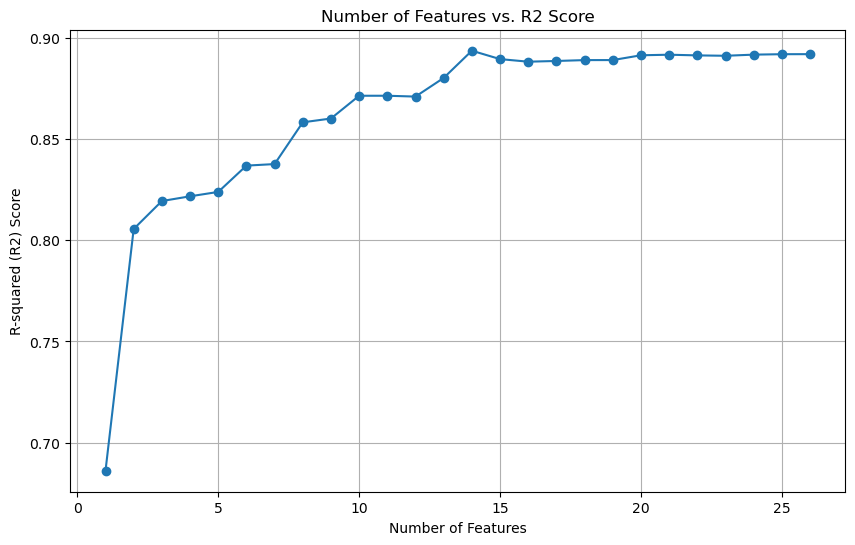

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming you have your dataset loaded as 'housing'
# Define your target variable
y = housing['LogSalePrice']

# Initialize lists to store the results
num_features = []  # Number of features
r2_scores = []     # R2 scores

# Create a loop to add one feature at a time and calculate R2
features = housing[['TotalSF','OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF',
                    'GarageCars','GarageArea','YearBuilt','FullBath','YearRemodAdd','MasVnrArea',
                    'TotRmsAbvGrd','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF',
                    'BsmtFullBath','HalfBath','LotArea','2ndFlrSF','BsmtUnfSF','BedroomAbvGr','ScreenPorch',
                    '3SsnPorch','PoolArea']]

for i in range(1, len(features.columns) + 1):
    # Select the first i features
    selected_features = features.iloc[:, :i]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the R2 score and store the results
    r2 = r2_score(y_test, y_pred)
    num_features.append(i)
    r2_scores.append(r2)

# Plot the number of features vs. R2 score
plt.figure(figsize=(10, 6))
plt.plot(num_features, r2_scores, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R2) Score')
plt.title('Number of Features vs. R2 Score')
plt.grid(True)
plt.show()


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Data Preparation
# ... (Your data preparation code here)

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate R-squared for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")
    
average_r2 = np.mean(r2_scores)
print(f"Average R^2: {average_r2:.4f}")



Fold R^2: 0.8569
Fold R^2: 0.8139
Fold R^2: 0.8580
Fold R^2: 0.8503
Fold R^2: 0.8133
Average R^2: 0.8385


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your features (X)
X = housing[['OverallQual', 'TotalSF', 'GarageCars', 'Fireplaces', 'YearRemodAdd']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]

0    41.778207
1    21.049467
2    10.811683
3     2.397206
4    22.849588
Name: VIF, dtype: float64

In [68]:
#High multicollinearity above. If YearRemodAdd is removed, it's improved

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your features (X)
X = housing[['OverallQual', 'TotalSF', 'GarageCars', 'Fireplaces']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]

0    21.868821
1    20.630049
2    10.773760
3     2.289568
Name: VIF, dtype: float64

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Prepare target and features
X = housing.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


R^2 Score: 0.9083379346632462
RMSE: 23746.081163824503


In [70]:
from sklearn.model_selection import cross_val_score

# Compute the R^2 scores
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Print R^2 score for each fold
for i, score in enumerate(scores, 1):
    print(f"R^2 Score for fold {i}: {score:.4f}")

# Print average R^2 score
print(f"\nAverage R^2 Score across the 5 folds: {scores.mean():.4f}")


R^2 Score for fold 1: 0.8602
R^2 Score for fold 2: 0.8893
R^2 Score for fold 3: 0.9132
R^2 Score for fold 4: 0.9022
R^2 Score for fold 5: 0.9096

Average R^2 Score across the 5 folds: 0.8949


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Convert categorical columns to one-hot encoding
X_train = pd.get_dummies(X_train)

# Handle missing data by filling with the mean value of each column
X_train.fillna(X_train.mean(), inplace=True)

# Now, try training the model again
model = RandomForestRegressor()
model.fit(X_train, y_train)



# Get feature importances
importances = model.feature_importances_

# To sort features by importance
sorted_idx = importances.argsort()
for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {importances[idx]}")


Functional_Sal: 0.0
HeatingQC_Po: 0.0
Condition2_RRAn: 0.0
RoofMatl_Roll: 0.0
Exterior2nd_PreCast: 0.0
RoofMatl_Metal: 0.0
MSZoning_I (all): 5.909015406716799e-09
SaleType_VWD: 6.035655304815758e-09
Condition2_Artery: 8.319919660946482e-09
Condition2_RRNn: 1.1810563813034933e-08
KitchenQual_Po: 1.2639096329656145e-08
Utilities_AllPub: 1.8517706340779016e-08
BsmtQual_Po: 2.9672205345946075e-08
Exterior2nd_CBlock: 3.503729697543723e-08
Exterior2nd_AsphShn: 1.2096050557539896e-07
SaleCondition_Alloca: 1.220734569276314e-07
GarageCond_Ex: 1.3703800447233543e-07
Exterior1st_CBlock: 1.6084935428151296e-07
Exterior1st_ImStucc: 1.6615536888462314e-07
Heating_Wall: 2.188478883213964e-07
ExterCond_Po: 2.2001277838877617e-07
RoofStyle_Shed: 2.3313167200321595e-07
BsmtCond_Po: 2.9012914818714976e-07
Exterior1st_AsphShn: 3.443393336011248e-07
Heating_Grav: 5.055495923283133e-07
SaleCondition_AdjLand: 5.379655019974438e-07
GarageQual_Ex: 5.562752879917192e-07
Exterior2nd_Stone: 8.600994752195952e-07

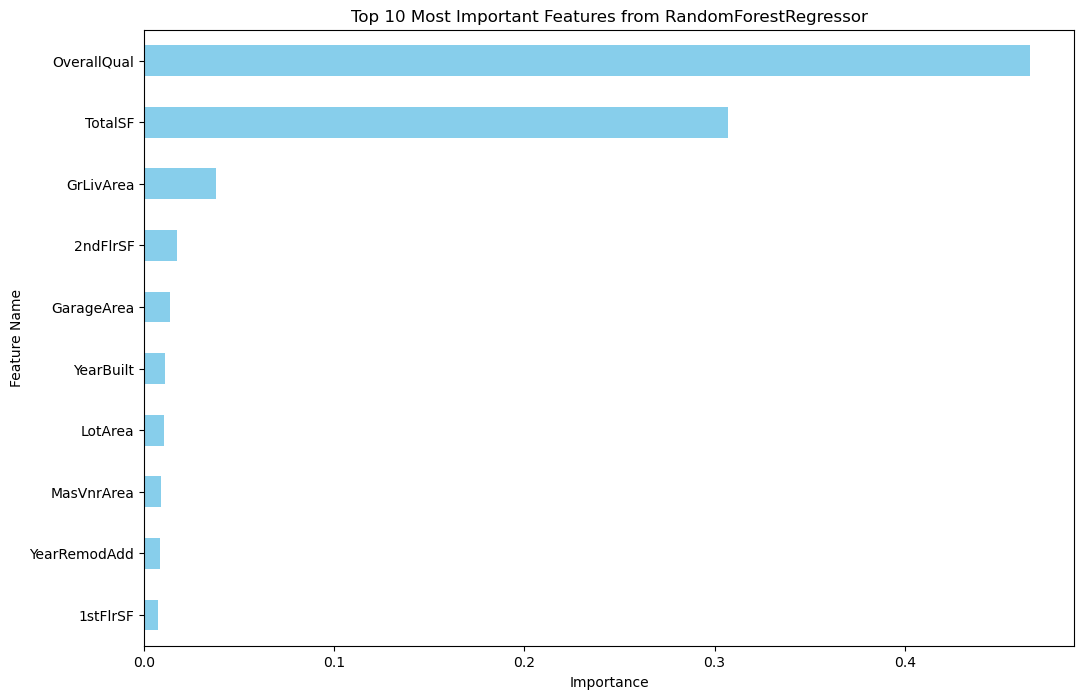

In [72]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_

# Map importances to the column names
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort and take top 10
top_10 = feature_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
top_10.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.show()


In [73]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your housing dataset
# Assuming you have a DataFrame named 'housing' containing your data

# Identify categorical columns
categorical_columns = housing.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
housing = pd.get_dummies(housing, columns=categorical_columns, drop_first=True)

# Define your feature matrix and target variable
X = housing.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an XGBoost regressor model
    model = xgb.XGBRegressor(objective="reg:squarederror")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R2 for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Display RMSE and R2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    fold += 1

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold 1: RMSE = 21993.0320, R2 = 0.9214
Fold 2: RMSE = 30534.3195, R2 = 0.8484
Fold 3: RMSE = 23516.4529, R2 = 0.9087
Fold 4: RMSE = 21733.6950, R2 = 0.9078
Fold 5: RMSE = 21729.4646, R2 = 0.8962
Mean RMSE: 23901.3928
Mean R2: 0.8965


In [94]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your housing dataset
# Assuming you have a DataFrame named 'housing' containing your data

# Identify categorical columns
categorical_columns = housing_coordinates.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
housing_coordinates = pd.get_dummies(housing_coordinates, columns=categorical_columns, drop_first=True)

# Define your feature matrix and target variable
X = housing_coordinates.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing_coordinates['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an XGBoost regressor model
    model = xgb.XGBRegressor(objective="reg:squarederror")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R2 for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Display RMSE and R2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    fold += 1

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold 1: RMSE = 24618.2774, R2 = 0.9226
Fold 2: RMSE = 24656.3211, R2 = 0.8913
Fold 3: RMSE = 22131.6248, R2 = 0.8955
Fold 4: RMSE = 20037.6961, R2 = 0.9292
Fold 5: RMSE = 20289.0592, R2 = 0.9139
Mean RMSE: 22346.5957
Mean R2: 0.9105


In [95]:
# Create an XGBoost regressor model (if you haven't already)
model = xgb.XGBRegressor(objective="reg:squarederror")
    
# Fit the model on the entire dataset
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features (adjust N as needed)
top_N = 15  # For example, to display the top 10 features
print(feature_importance_df.head(top_N))


                          Feature  Importance
5                     OverallQual    0.321348
38                        TotalSF    0.144201
157                  ExterQual_TA    0.105330
168                   BsmtQual_Gd    0.025754
15                       2ndFlrSF    0.022689
221             GarageType_Attchd    0.021842
207                KitchenQual_Gd    0.020836
26                     GarageCars    0.018127
202                  CentralAir_Y    0.016363
239                 GarageCond_TA    0.016305
209                KitchenQual_TA    0.011939
1                       GrLivArea    0.011914
24                     Fireplaces    0.009616
1813  Prop_Addr_3313 STOCKBURY ST    0.009074
7                       YearBuilt    0.008792


In [107]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Set negatively correlated neighborhoods to zero
negative_neighborhoods = [
    'Neighborhood_OldTown', 'Neighborhood_NAmes', 'Neighborhood_Edwards',
    'Neighborhood_IDOTRR', 'Neighborhood_BrkSide', 'Neighborhood_MeadowV',
    'Neighborhood_Sawyer', 'Neighborhood_BrDale', 'Neighborhood_SWISU',
    'Neighborhood_NPkVill', 'Neighborhood_Mitchel', 'Neighborhood_Landmrk'
]
for neighborhood in negative_neighborhoods:
    housing_coordinates[neighborhood] = 0

# Assuming the target is 'SalePrice' and other columns are features
X = housing_coordinates.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing_coordinates['SalePrice']

# Drop non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])


# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print('XBG with negatively correlated neighborhods set to 0')    
print("MSE for each fold:", mse_scores)
print("R^2 for each fold:", r2_scores)


XBG with negatively correlated neighborhods set to 0
MSE for each fold: [119006348.07399593, 240176930.25097805, 148573369.38060457, 207340991.9758226, 128881195.3494363]
R^2 for each fold: [0.9789268670844546, 0.9601354750350116, 0.9724910910695423, 0.968221400680643, 0.9750483206791408]


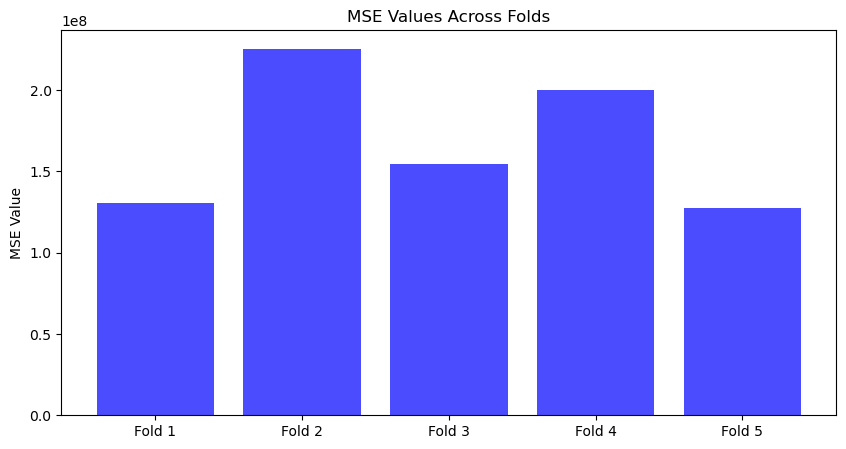

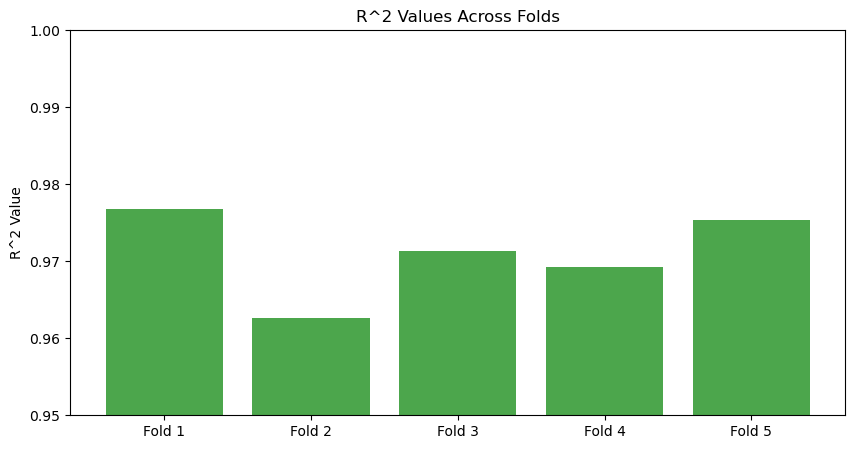

In [108]:
import matplotlib.pyplot as plt

# Given results
mse_values = [130714298.66325526, 225462050.7319067, 154557075.00264412, 200189966.26593482, 127393680.68273637]
r2_values = [0.9768536734865577, 0.9625778481693998, 0.9713831858392202, 0.9693174192662174, 0.9753363067491639]
folds = [f"Fold {i}" for i in range(1, len(mse_values)+1)]

# Bar plot for MSE values
plt.figure(figsize=(10, 5))
plt.bar(folds, mse_values, color='blue', alpha=0.7)
plt.ylabel('MSE Value')
plt.title('MSE Values Across Folds')
plt.show()

# Bar plot for R^2 values
plt.figure(figsize=(10, 5))
plt.bar(folds, r2_values, color='green', alpha=0.7)
plt.ylabel('R^2 Value')
plt.ylim(0.95, 1)  # To zoom into the range of R^2 values for better clarity
plt.title('R^2 Values Across Folds')
plt.show()


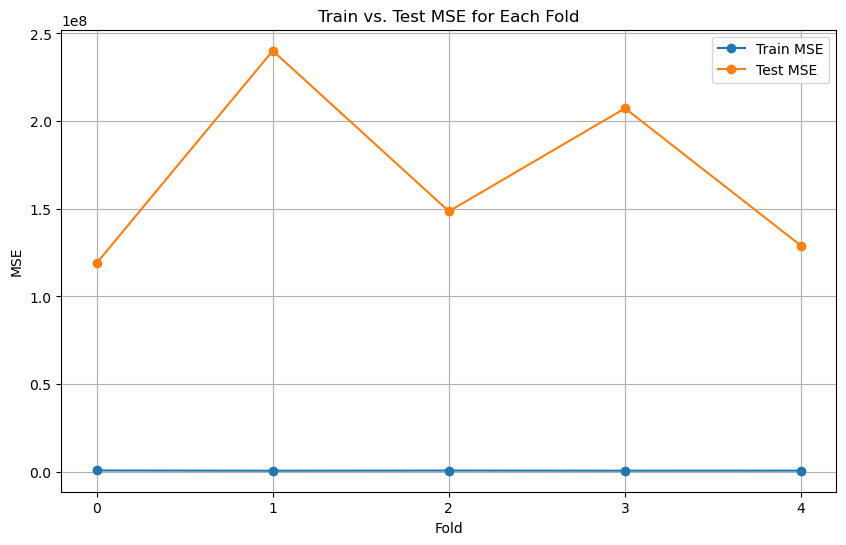

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Lists to store training and test MSE for each fold
train_mse_scores = []
test_mse_scores = []

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    train_mse_scores.append(mean_squared_error(y_train, train_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(train_mse_scores))
plt.plot(x_axis, train_mse_scores, label='Train MSE', marker='o')
plt.plot(x_axis, test_mse_scores, label='Test MSE', marker='o')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Train vs. Test MSE for Each Fold')
plt.xticks(x_axis)
plt.grid(True)
plt.show()


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'lambda': [0, 0.5, 1],
    'alpha': [0, 0.5, 1]
}

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best hyperparameters: {'alpha': 0, 'colsample_bytree': 1.0, 'gamma': 0.0, 'lambda': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}


In [111]:
best_params = {
    'alpha': 0,
    'colsample_bytree': 1.0,
    'gamma': 0.0,
    'lambda': 1,
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 1.0,
    'objective': 'reg:squarederror'  # This is the default for regression tasks in XGBoost
}

model = xgb.XGBRegressor(**best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    

print("MSE for each fold:", mse_scores)
print("R^2 for each fold:", r2_scores)
print("Average MSE:", sum(mse_scores) / len(mse_scores))
print("Average R^2:", sum(r2_scores) / len(r2_scores))



MSE for each fold: [98538806.58546123, 158349232.8779519, 75965519.71544346, 125438737.0540172, 90480362.40312581]
R^2 for each fold: [0.9825511714112637, 0.9737172219636021, 0.9859347030196663, 0.9807743402499463, 0.9824828053355901]
Average MSE: 109754531.72719991
Average R^2: 0.9810920483960137


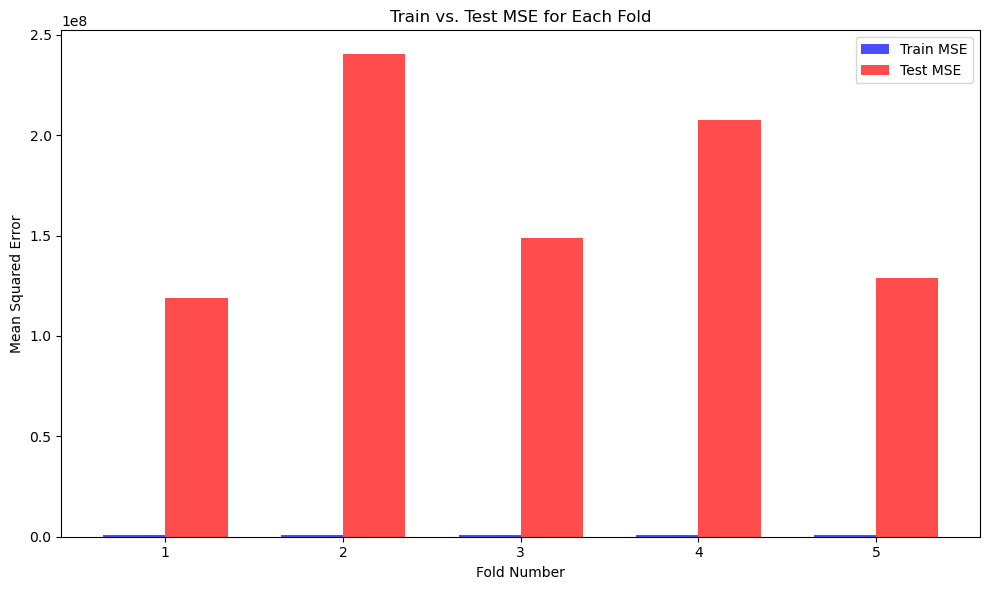

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Number of folds
n_folds = len(train_mse_scores)

# Bar width for plotting
bar_width = 0.35
index = np.arange(n_folds)

# Creating the bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, train_mse_scores, bar_width, label='Train MSE', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, test_mse_scores, bar_width, label='Test MSE', color='r', alpha=0.7)

# Labeling and titling
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.title('Train vs. Test MSE for Each Fold')
plt.xticks(index + bar_width / 2, range(1, n_folds+1))  # X-axis labels: 1, 2, 3, ...
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()
